# Linear Regression

Models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. The goal is to find the best-fitting line that minimizes the error between the predicted and actual values.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


In [2]:
torch.manual_seed(14)
np.random.seed(14)

# generate sample data
X = torch.arange(1, 100, dtype=torch.float32).view(-1, 1) * 10
y  = 2 * X + 1 + torch.arange(1, 100, dtype=torch.float32).view(-1, 1)


In [3]:
# define model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# instantiate model
model = LinearRegressionModel()

# define loss function and optimizer
lossfn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [4]:
# training loop
epochs = 500

for epoch in range(epochs):
    # forward pass
    y_pred = model(X)

    # compute loss
    loss = lossfn(y_pred, y)

    # backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch: [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# get the parameters
[w, b] = model.parameters()
print(f"Learned parameters: w = {w.item():.4f}, b = {b.item():.4f}") 


Epoch: [10/500], Loss: 1164775.1250
Epoch: [20/500], Loss: 1044759.9375
Epoch: [30/500], Loss: 933099.8125
Epoch: [40/500], Loss: 830091.6875
Epoch: [50/500], Loss: 735690.5625
Epoch: [60/500], Loss: 649629.6875
Epoch: [70/500], Loss: 571521.6250
Epoch: [80/500], Loss: 500922.5000
Epoch: [90/500], Loss: 437365.0000
Epoch: [100/500], Loss: 380376.5625
Epoch: [110/500], Loss: 329487.1250
Epoch: [120/500], Loss: 284235.2500
Epoch: [130/500], Loss: 244170.2500
Epoch: [140/500], Loss: 208854.9062
Epoch: [150/500], Loss: 177868.1875
Epoch: [160/500], Loss: 150806.2188
Epoch: [170/500], Loss: 127284.6094
Epoch: [180/500], Loss: 106939.5547
Epoch: [190/500], Loss: 89429.3125
Epoch: [200/500], Loss: 74434.6641
Epoch: [210/500], Loss: 61659.8281
Epoch: [220/500], Loss: 50832.4648
Epoch: [230/500], Loss: 41703.5938
Epoch: [240/500], Loss: 34047.3555
Epoch: [250/500], Loss: 27660.3535
Epoch: [260/500], Loss: 22360.6348
Epoch: [270/500], Loss: 17986.7168
Epoch: [280/500], Loss: 14396.3584
Epoch: [2

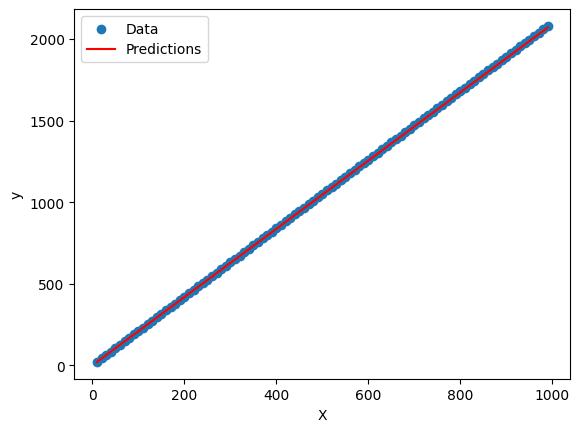

In [5]:
# make predictions
with torch.no_grad():
    y_pred = model(X)

# plot results
plt.scatter(X, y, label="Data")
plt.plot(X, y_pred.detach().numpy(), label="Predictions", color="red")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [6]:
# calculate R-squared
y_mean = torch.mean(y)
ss_total = torch.sum((y - y_mean) ** 2)
ss_res = torch.sum((y - y_pred) ** 2)

r2 = 1 - (ss_res / ss_total)

print(f"R-squared: {r2.item():.4f}")


R-squared: 0.9999
